In [105]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import collections

In [106]:
train_df = pd.read_csv("dataset/wine_train.csv", sep=';', quotechar='"')
test_df = pd.read_csv("dataset/wine_test.csv", sep=';', quotechar='"')

In [107]:
# Funcție de grupare
def map_quality(q):
    if q in [3, 4]:
        return "low"
    elif q in [5, 6]:
        return "medium"
    else:
        return "high"

In [108]:
train_df["quality_group"] = train_df["quality"].apply(map_quality)
test_df["quality_group"] = test_df["quality"].apply(map_quality)

print("Distribuție train:")
print(train_df["quality_group"].value_counts())
print("\nDistribuție test:")
print(test_df["quality_group"].value_counts())

Distribuție train:
quality_group
medium    2932
high       833
low        153
Name: count, dtype: int64

Distribuție test:
quality_group
medium    723
high      227
low        30
Name: count, dtype: int64


In [109]:
X_train = train_df.drop(["quality", "quality_group"], axis=1)
y_train = train_df["quality_group"]

X_test = test_df.drop(["quality", "quality_group"], axis=1)
y_test = test_df["quality_group"]

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
model = RidgeClassifier(alpha=5.0, fit_intercept=True, solver='sag', random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAcuratețea modelului RidgeClassifier pe grupuri: {:.2f}%".format(accuracy * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Acuratețea modelului RidgeClassifier pe grupuri: 76.22%

Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.20      0.31       227
         low       0.00      0.00      0.00        30
      medium       0.77      0.97      0.86       723

    accuracy                           0.76       980
   macro avg       0.48      0.39      0.39       980
weighted avg       0.72      0.76      0.70       980



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

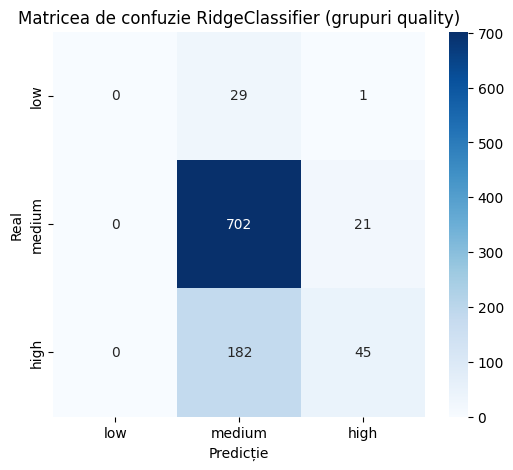

In [113]:
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["low", "medium", "high"],
    yticklabels=["low", "medium", "high"]
)
plt.xlabel("Predicție")
plt.ylabel("Real")
plt.title("Matricea de confuzie RidgeClassifier (grupuri quality)")
plt.show()

In [114]:
print(model.classes_)

print(train_df["quality"].value_counts().sort_index())
print(test_df["quality"].value_counts().sort_index())

['high' 'low' 'medium']
quality
3      15
4     138
5    1166
6    1766
7     688
8     140
9       5
Name: count, dtype: int64
quality
3      5
4     25
5    291
6    432
7    192
8     35
Name: count, dtype: int64


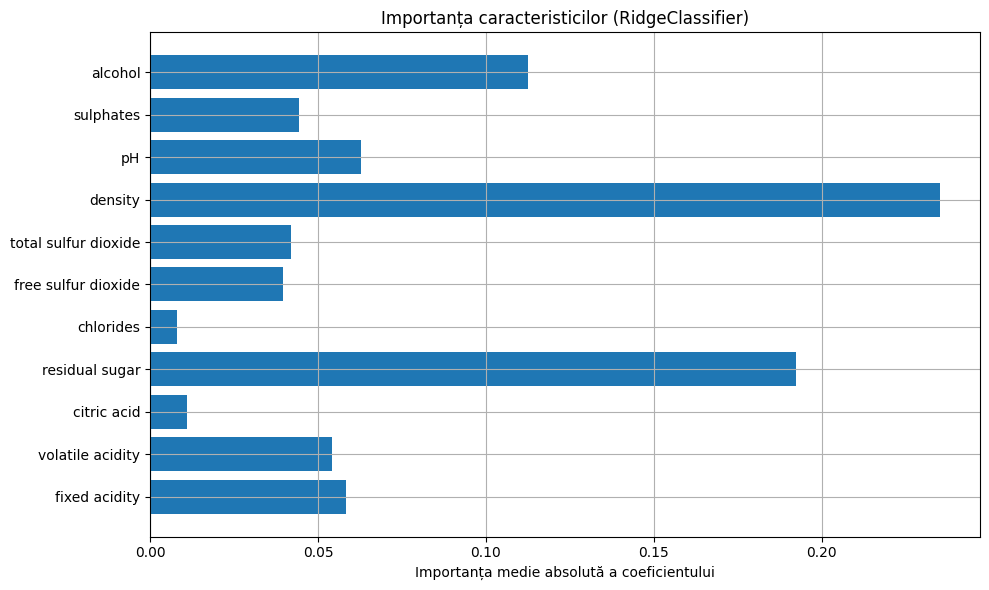

In [115]:
# Media absolută a coeficienților pe fiecare caracteristică
mean_abs_coefs = np.mean(np.abs(model.coef_), axis=0)

# Numele caracteristicilor
feature_names = X_train.columns

# Plot
plt.figure(figsize=(10,6))
plt.barh(feature_names, mean_abs_coefs)
plt.xlabel("Importanța medie absolută a coeficientului")
plt.title("Importanța caracteristicilor (RidgeClassifier)")
plt.grid(True)
plt.tight_layout()
plt.show()

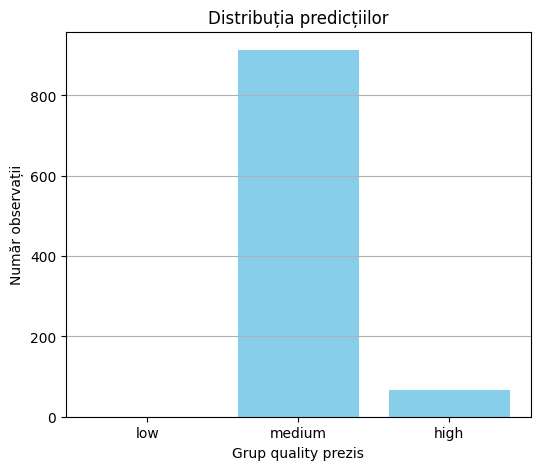

In [116]:
# Numărăm predicțiile
pred_counts = collections.Counter(y_pred)

# Asigurăm ordinea consistentă
labels = ["low", "medium", "high"]
counts = [pred_counts.get(label, 0) for label in labels]

# Plot
plt.figure(figsize=(6,5))
plt.bar(labels, counts, color="skyblue")
plt.xlabel("Grup quality prezis")
plt.ylabel("Număr observații")
plt.title("Distribuția predicțiilor")
plt.grid(True, axis="y")
plt.show()

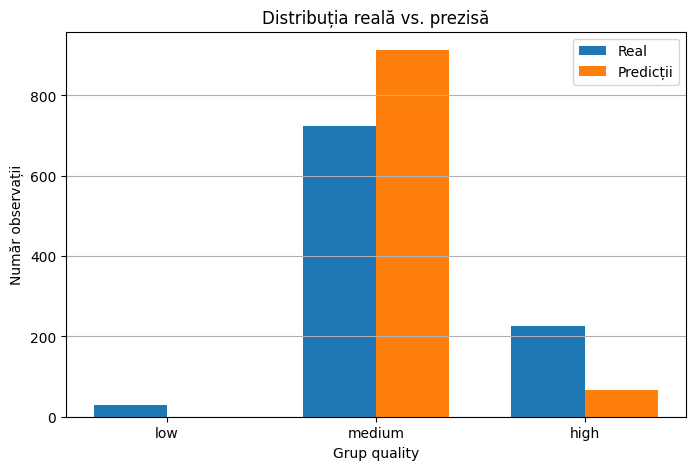

In [117]:


# Numărăm etichetele reale
real_counts = collections.Counter(y_test)

real_counts_values = [real_counts.get(label, 0) for label in labels]

# Plot comparativ
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, real_counts_values, width, label="Real")
plt.bar(x + width/2, counts, width, label="Predicții")
plt.xticks(x, labels)
plt.xlabel("Grup quality")
plt.ylabel("Număr observații")
plt.title("Distribuția reală vs. prezisă")
plt.legend()
plt.grid(True, axis="y")
plt.show()
